In [13]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
browser = Browser('chrome')

In [15]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [16]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [17]:
rows = soup.find_all('tr')
data = [
    [cell.get_text(strip=True) for cell in row.find_all('td')]
    for row in rows]

In [18]:
# Extract data from the second row (index 1)
first_row = rows[0]

# Extract text content from each cell in the second row
headings = [cell.get_text(strip=True) for cell in first_row.find_all('th')]

# Print or use the extracted data
print(headings)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [19]:
mars_df = pd.DataFrame(data, columns=headings).drop(0).reset_index(drop=True)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [20]:
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [21]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [22]:
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [23]:
number_of_months = mars_df['month'].value_counts()
number_of_months_sorted = number_of_months.sort_index()
number_of_months_sorted

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [24]:
number_of_months.sum()

1867

In [25]:
average_low_temp = mars_df.groupby('month')['min_temp'].mean()
average_low_temp_sorted = average_low_temp.sort_values()
average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

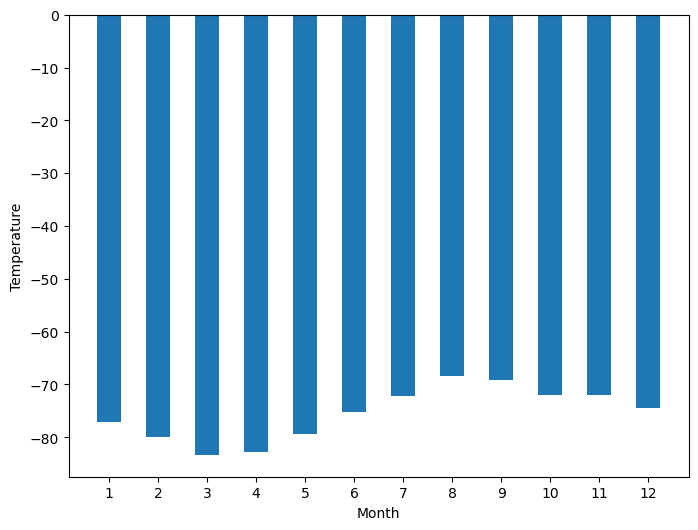

<Figure size 640x480 with 0 Axes>

In [26]:
x_axis = average_low_temp.index
y_axis = average_low_temp.values
plt.figure(figsize=(8,6))
bar_width = 0.5
plt.bar(x_axis, y_axis, width = bar_width)
plt.xticks(x_axis)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()
plt.tight_layout()

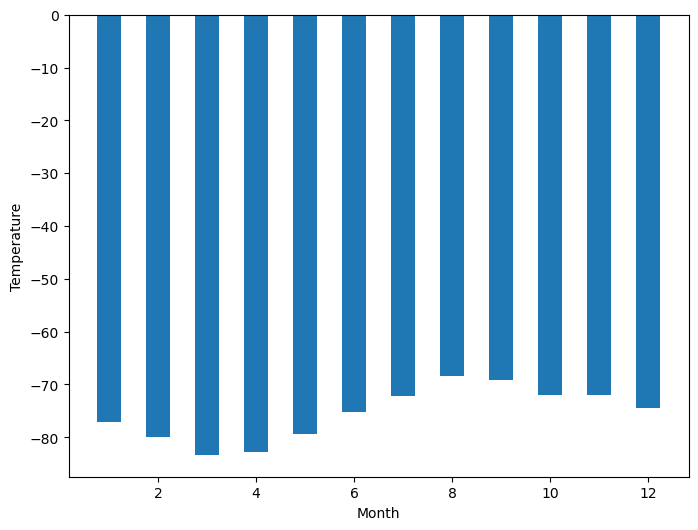

In [27]:
sorted_avg_low_temp = average_low_temp.sort_values(ascending=True)
plt.figure(figsize=(8,6))
bar_width = 0.5
plt.bar(sorted_avg_low_temp.index, sorted_avg_low_temp.values, width = bar_width)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

In [28]:
# The third month has the lowest average temperature, and the eighth month has the highest average temperature

In [29]:
average_pressure = mars_df.groupby('month')['pressure'].mean()
average_pressure_sorted = average_pressure.sort_values()
average_pressure_sorted

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

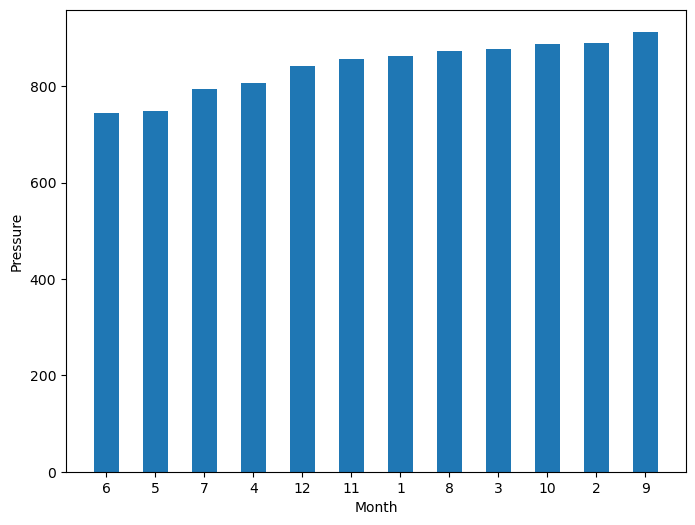

In [30]:
sorted_average_pressure = average_pressure.sort_values(ascending=True)
plt.figure(figsize=(8,6))
bar_width = 0.5
plt.bar(sorted_average_pressure.index.astype(str), sorted_average_pressure.values, width = bar_width)
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.show()

In [31]:
# The sixth month has the lowest average atmospheric pressure, and the ninth month has the highest pressure

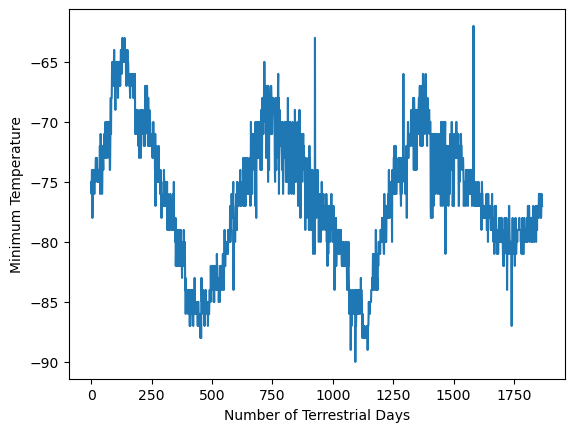

In [35]:
days_passed = mars_df.index
minimum_temp = mars_df['min_temp']
plt.plot(days_passed, mars_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.show()

In [36]:
# The difference between two of the peaks seems to be 1400 - 750 = 650. Google search confirms a Martian year to be equal to 687 Earth days.

In [37]:
csv_file_path = 'mars_df.csv'
mars_df.to_csv(csv_file_path, index=False)

In [38]:
browser.quit()